# COVID-19 analysis with SIR-F model

## Setup

In [1]:
!pip install --upgrade covsirphy
!pip install openpyxl dask[complete]

     |████████████████████████████████| 193 kB 5.1 MB/s 
     |████████████████████████████████| 1.0 MB 39.7 MB/s 
     |████████████████████████████████| 235 kB 51.6 MB/s 
     |████████████████████████████████| 308 kB 62.2 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 50 kB 7.1 MB/s 
     |████████████████████████████████| 167 kB 51.4 MB/s 
     |████████████████████████████████| 62 kB 757 kB/s 
     |████████████████████████████████| 2.0 MB 67.5 MB/s 
     |████████████████████████████████| 918 kB 68.0 MB/s 
     |████████████████████████████████| 6.3 MB 44.0 MB/s 
     |████████████████████████████████| 15.4 MB 40.3 MB/s 
     |████████████████████████████████| 60.3 MB 1.2 MB/s 
     |████████████████████████████████| 80 kB 8.9 MB/s 
     |████████████████████████████████| 209 kB 66.2 MB/s 
     |████████████████████████████████| 75 kB 3.7 MB/s 
     |████████████████████████████████| 149 kB 57.8 MB/s 
     |████████████████

## Import modules

In [2]:
import os
import math
import datetime
from pprint import pprint

import covsirphy as cs

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

# Matplotlib
plt.style.use("seaborn-ticks")
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["font.size"] = 12.0
plt.rcParams["figure.figsize"] = (15, 12)
# Pandas
pd.set_option("display.max_colwidth", 1000)

## Download data

In [3]:
!gdown --id 1WFuJGRbJkR9jiT4WNhptTLZ99Y3zM5tU
!unrar x -y /content/covid.rar

Downloading...
From: https://drive.google.com/uc?id=1WFuJGRbJkR9jiT4WNhptTLZ99Y3zM5tU
To: /content/covid.rar
100% 13.0M/13.0M [00:00<00:00, 49.0MB/s]

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/covid.rar

Creating    kaggle                                                    OK
Creating    kaggle/input                                              OK
Extracting  kaggle/input/covid19dh.csv                                    32% 43%  OK 
Extracting  kaggle/input/covid_japan.csv                                  46%  OK 
Extracting  kaggle/input/google_cloud_platform.csv                        79% 92%  OK 
Extracting  kaggle/input/ourworldindata.csv                               99%  OK 
Extracting  kaggle/input/wbdata_population_pyramid.csv                    99%  OK 
All OK


## Load data

In [4]:
# Create instance of covsirphy.DataLoader class
data_loader = cs.DataLoader(directory="kaggle/input")
# Retrieve the dataset of the number of COVID-19 cases
# Kaggle platform: covid19dh.csv will be saved in /output/kaggle/working/input
# Local env: covid19dh.csv will be saved in kaggle/input
jhu_data = data_loader.jhu()

jhu_data.cleaned().tail()

Retrieving COVID-19 dataset in Japan from https://github.com/lisphilar/covid19-sir/data/japan
Retrieving datasets from COVID-19 Data Hub https://covid19datahub.io/
	Please set verbose=2 to see the detailed citation list.
Retrieving datasets from Our World In Data https://github.com/owid/covid-19-data/
Retrieving datasets from COVID-19 Open Data by Google Cloud Platform https://github.com/GoogleCloudPlatform/covid-19-open-data


,Date,ISO3,Country,Province,Confirmed,Infected,Fatal,Recovered,Population
1010945,2021-12-03,ZWE,Zimbabwe,-,137441,49739,4708,82994,14439018
1010946,2021-12-04,ZWE,Zimbabwe,-,138523,50820,4709,82994,14439018
1010947,2021-12-05,ZWE,Zimbabwe,-,139046,51342,4710,82994,14439018
1010948,2021-12-06,ZWE,Zimbabwe,-,139046,51342,4710,82994,14439018
1010949,2021-12-07,ZWE,Zimbabwe,-,141601,53894,4713,82994,14439018


In [5]:
df = jhu_data.cleaned()
jhu_first_date, jhu_last_date = df["Date"].min(), df["Date"].max()
jhu_elapsed = (jhu_last_date - jhu_first_date).days
print(f"{jhu_elapsed} days have passed from the date of the first record.")

707 days have passed from the date of the first record.


## Show the map

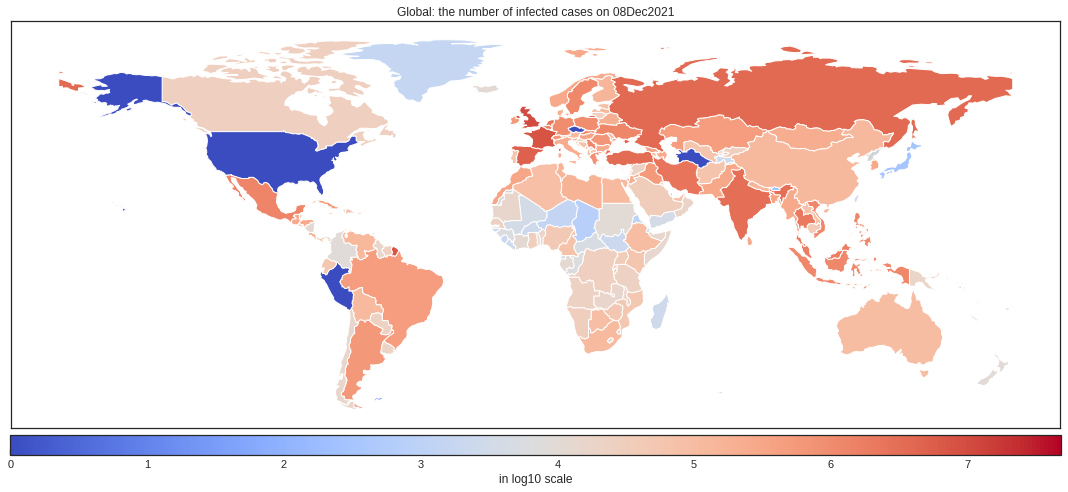

In [6]:
jhu_data.map(country=None, variable="Infected")

# Malta

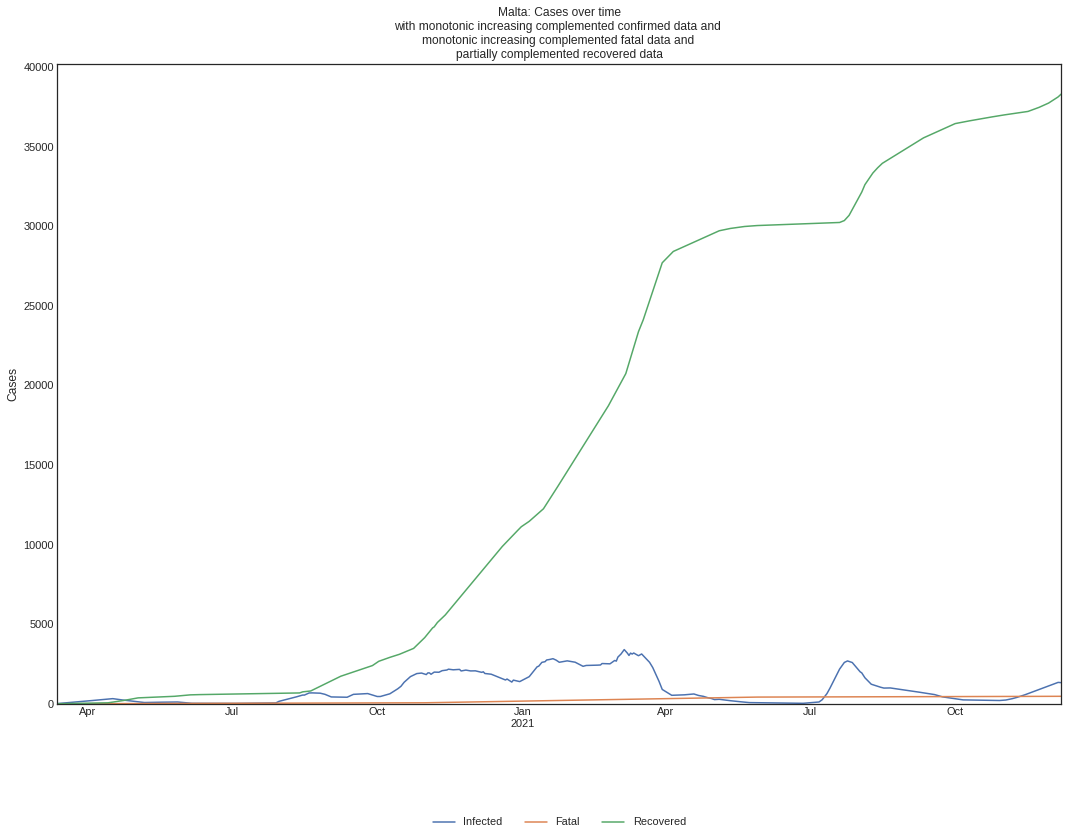

,Date,Infected,Fatal,Recovered
630,2021-12-03,1351,468,37987
631,2021-12-04,1332,468,38065
632,2021-12-05,1342,468,38124
633,2021-12-06,1301,468,38246
634,2021-12-07,1326,468,38307


In [7]:
snl = cs.Scenario(country="Malta", province=None)
snl.register(jhu_data)

df = snl.records()
df.tail()

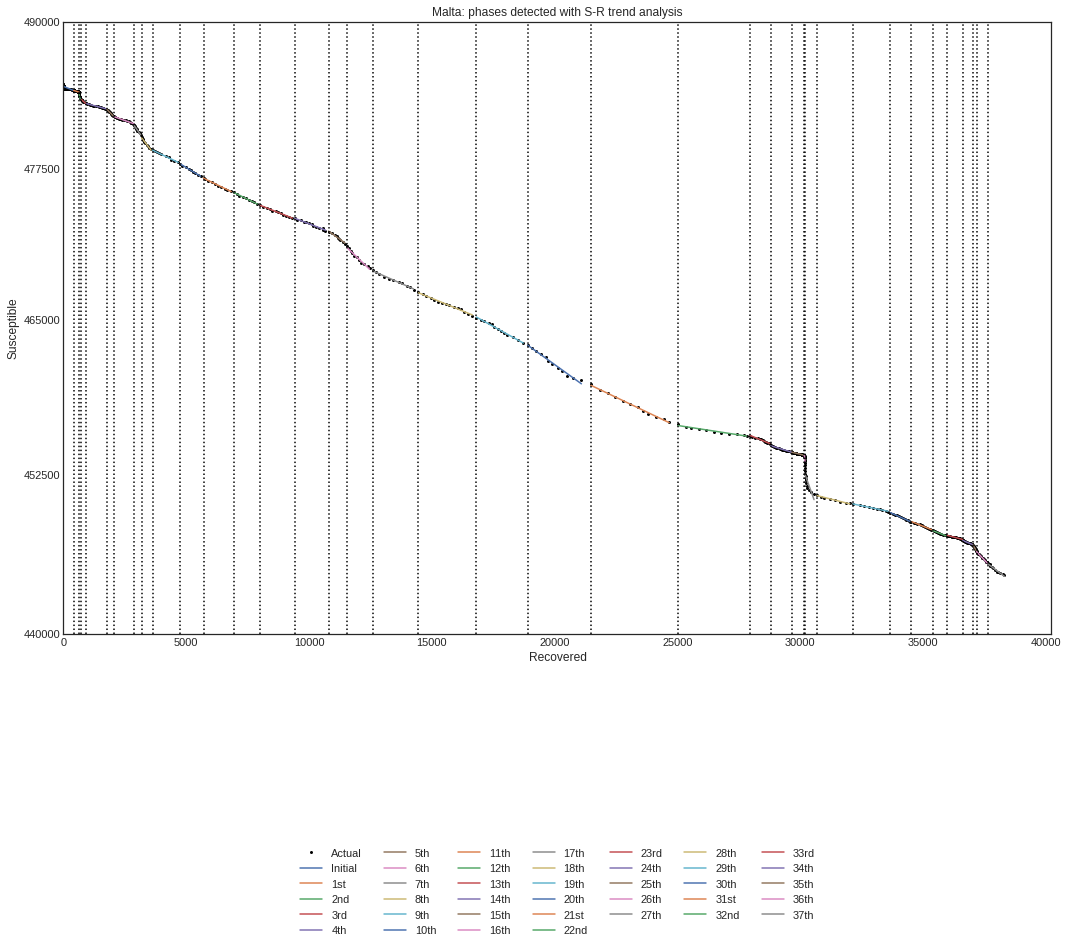

In [8]:
_ = snl.trend()

## Get model parameters

In [9]:
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 2 CPUs...
	 5th phase (09Sep2020 - 19Sep2020): finished  234 trials in 0 min  7 sec
	 0th phase (13Mar2020 - 13May2020): finished  275 trials in 0 min  8 sec
	 6th phase (20Sep2020 - 07Oct2020): finished  355 trials in 0 min 12 sec
	 1st phase (14May2020 - 03Aug2020): finished  434 trials in 0 min 14 sec
	 2nd phase (04Aug2020 - 13Aug2020): finished  261 trials in 0 min  7 sec
	 7th phase (08Oct2020 - 16Oct2020): finished  409 trials in 0 min 14 sec
	 3rd phase (14Aug2020 - 22Aug2020): finished  177 trials in 0 min  5 sec
	 8th phase (17Oct2020 - 25Oct2020): finished  319 trials in 0 min 10 sec
	 4th phase (23Aug2020 - 08Sep2020): finished  551 trials in 0 min 21 sec
	 9th phase (26Oct2020 - 04Nov2020): finished  452 trials in 0 min 16 sec
	10th phase (05Nov2020 - 13Nov2020): finished  334 trials in 0 min 11 sec
	15th phase (28Dec2020 - 05Jan2021): finished  258 trials in 0 min  8 sec
	11th phase (14Nov2020 - 23Nov2020): fi

In [10]:
snl.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,13Mar2020,13May2020,484630,SIR-F,2.72,0.010225,0.000000,0.052911,0.019233,720,-,-,-,-,0.884056,275.0,0 min 8 sec
1st,Past,14May2020,03Aug2020,484630,SIR-F,0.74,0.023865,0.000000,0.028411,0.037430,720,-,-,-,-,0.414295,434.0,0 min 14 sec
2nd,Past,04Aug2020,13Aug2020,484630,SIR-F,6.43,0.000760,0.000000,0.064173,0.009967,720,-,-,-,-,0.030380,261.0,0 min 7 sec
3rd,Past,14Aug2020,22Aug2020,484630,SIR-F,1.31,0.001028,0.000064,0.077625,0.059219,720,0.001,7776,6,8,0.154253,177.0,0 min 5 sec
4th,Past,23Aug2020,08Sep2020,484630,SIR-F,0.78,0.000278,0.000165,0.054385,0.069271,720,0,3037,9,7,0.108514,551.0,0 min 21 sec
5th,Past,09Sep2020,19Sep2020,484630,SIR-F,1.46,0.000165,0.000136,0.079862,0.054544,720,0,3677,6,9,0.071783,234.0,0 min 7 sec
6th,Past,20Sep2020,07Oct2020,484630,SIR-F,0.90,0.006828,0.000482,0.104281,0.114600,720,0.007,1036,4,4,0.163704,355.0,0 min 12 sec
7th,Past,08Oct2020,16Oct2020,484630,SIR-F,1.93,0.000127,0.000422,0.099465,0.051235,720,0,1184,5,9,0.059428,409.0,0 min 14 sec
8th,Past,17Oct2020,25Oct2020,484630,SIR-F,2.02,0.000446,0.000163,0.065557,0.032326,720,0,3064,7,15,0.052900,319.0,0 min 10 sec
9th,Past,26Oct2020,04Nov2020,484630,SIR-F,1.02,0.000537,0.000630,0.073867,0.071573,720,0.001,793,6,6,0.112635,452.0,0 min 16 sec


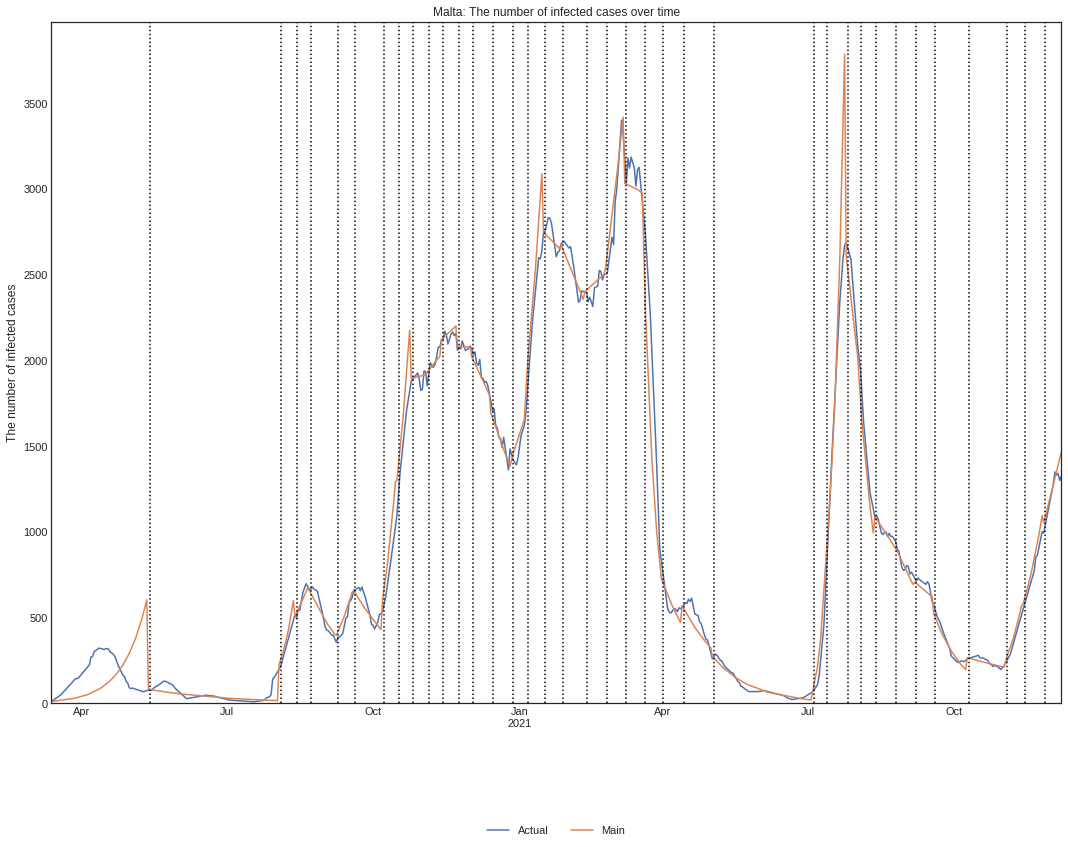

In [11]:
# Compare the actual values and the main scenario
_ = snl.history("Infected")

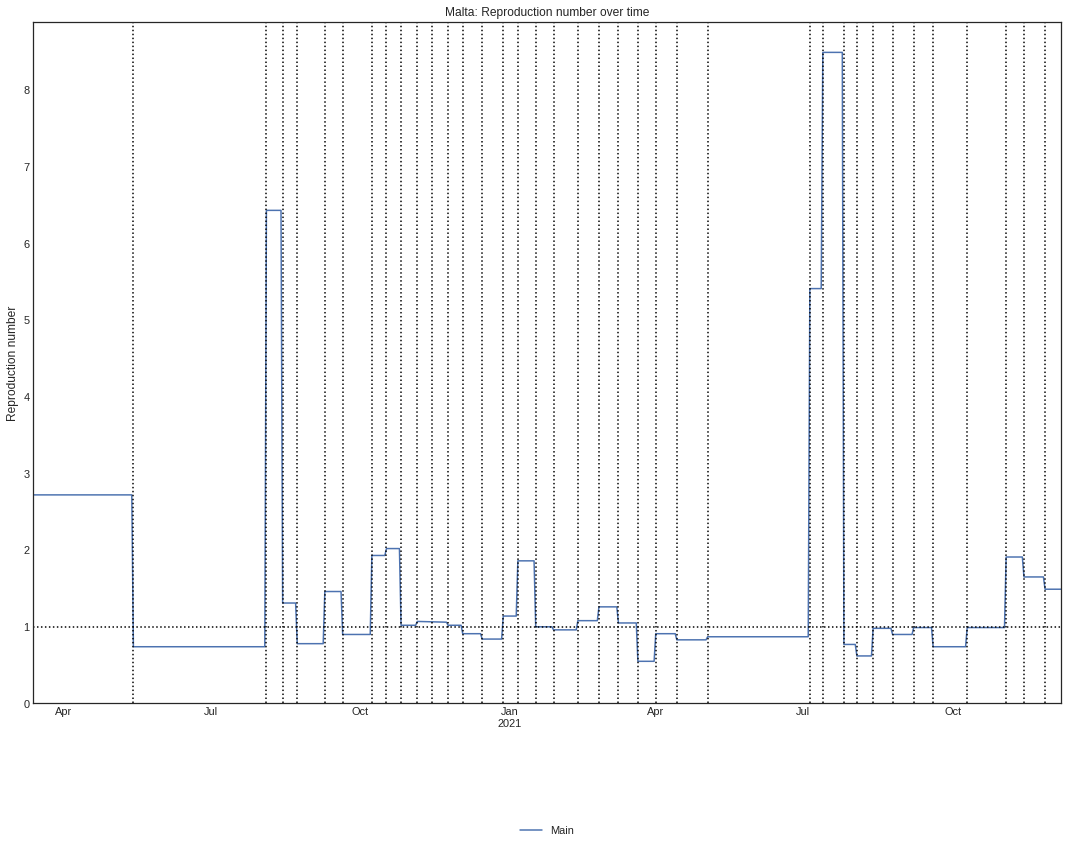

In [12]:
_ = snl.history(target="Rt")

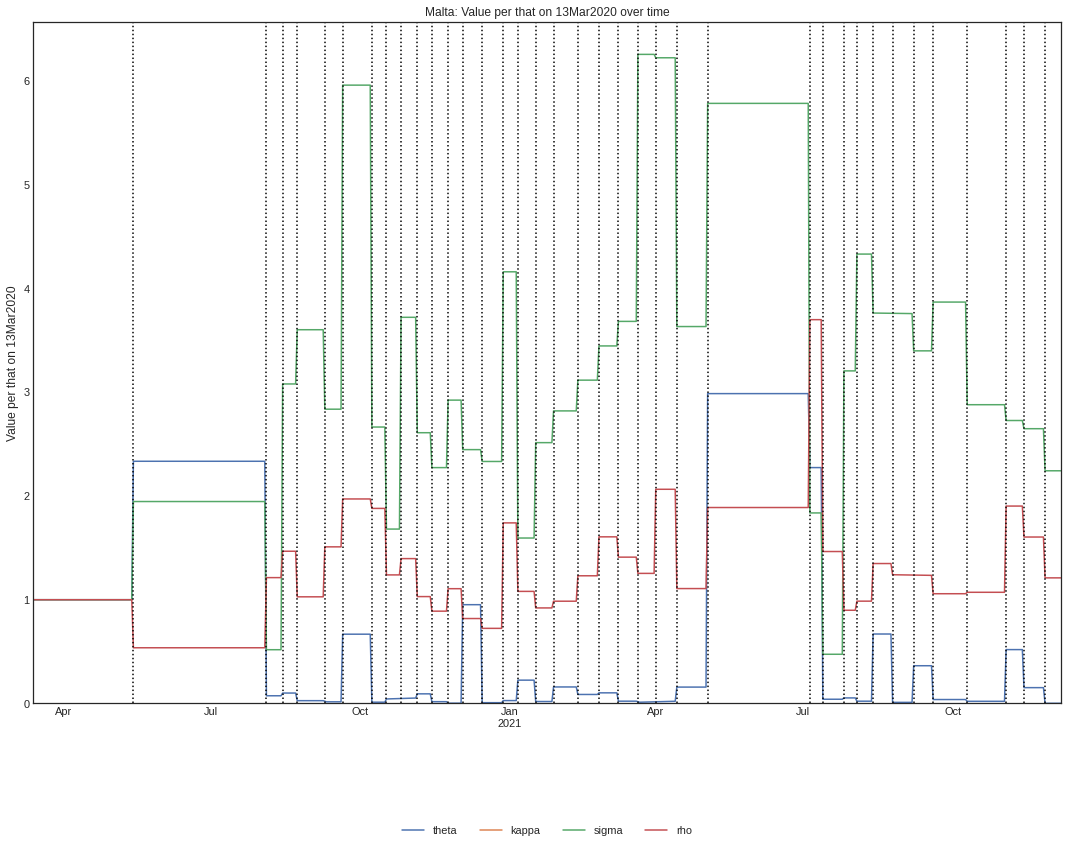

In [13]:
_ = snl.history_rate()

## Predict infected for 7, 30 and 300 days

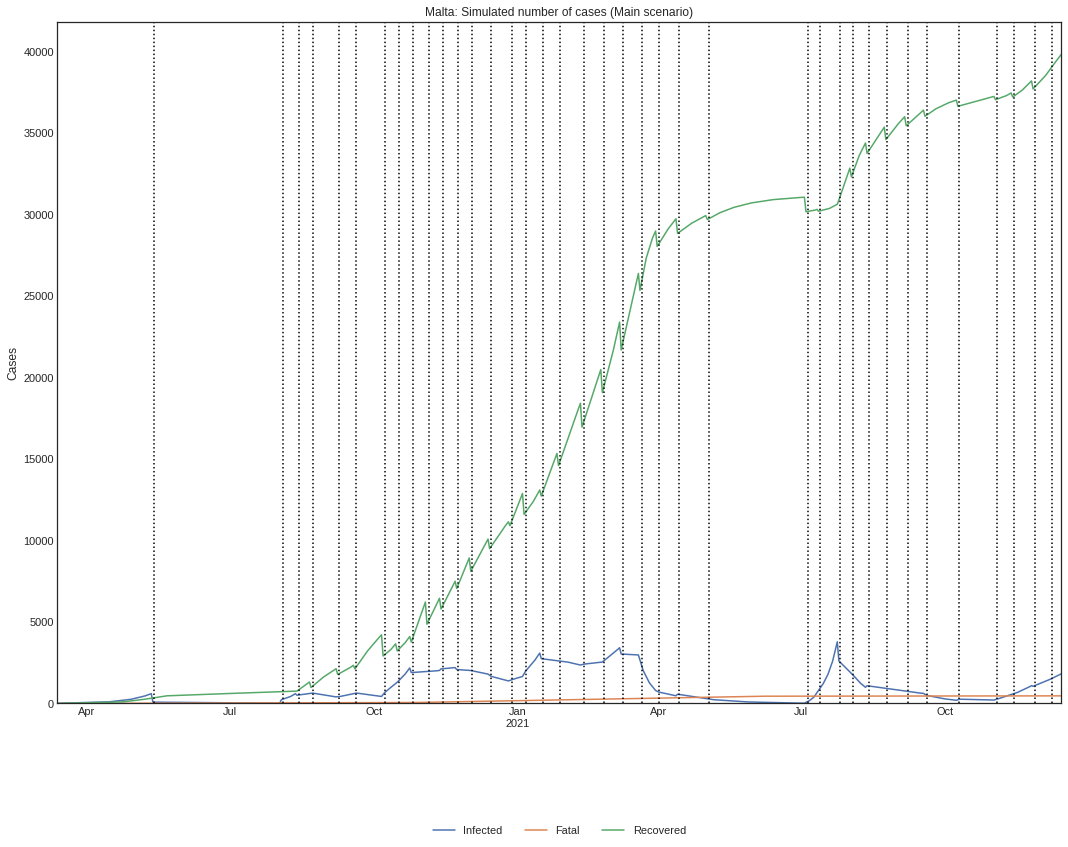

,Date,Infected,Fatal,Recovered
637,2021-12-10,1634,468,39299
638,2021-12-11,1685,468,39443
639,2021-12-12,1738,468,39590
640,2021-12-13,1792,468,39742
641,2021-12-14,1820,468,39820


In [14]:
snl.add(days=7)
df = snl.simulate()
df.tail()

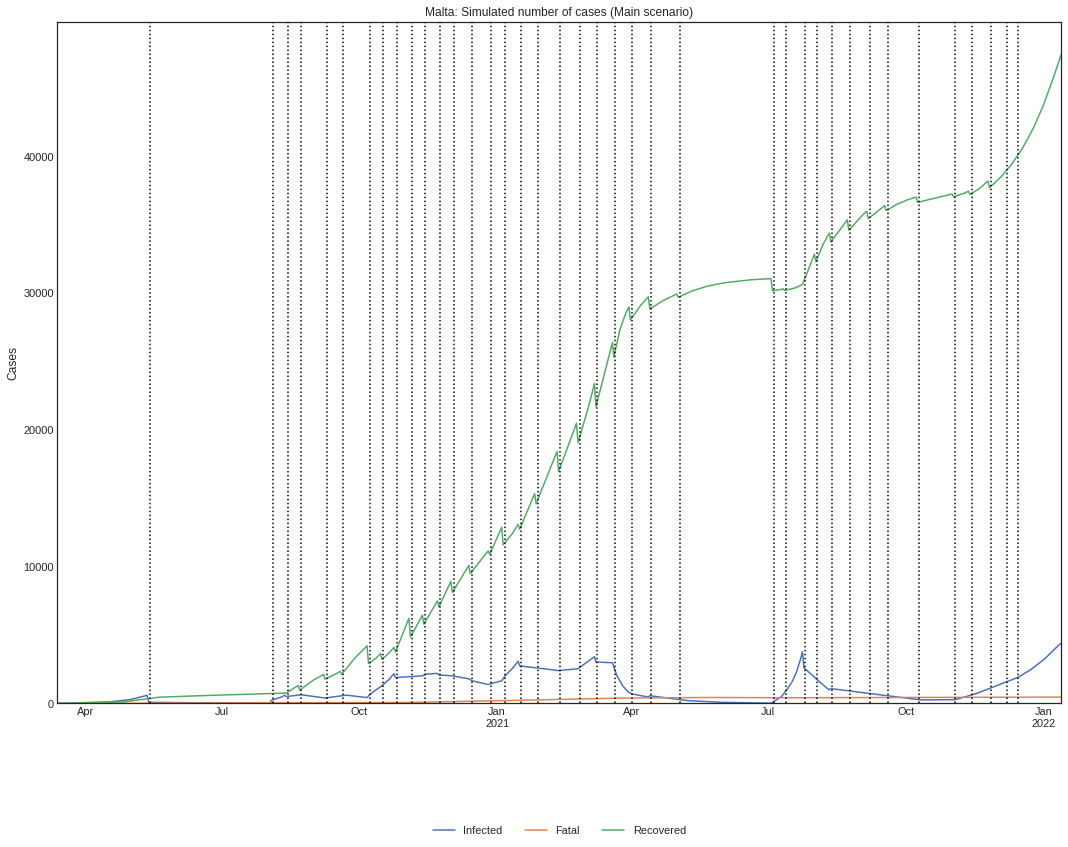

,Date,Infected,Fatal,Recovered
667,2022-01-09,4001,468,46180
668,2022-01-10,4116,468,46530
669,2022-01-11,4234,468,46890
670,2022-01-12,4355,468,47261
671,2022-01-13,4416,468,47450


In [15]:
snl.add(days=30)
df = snl.simulate()
df.tail()

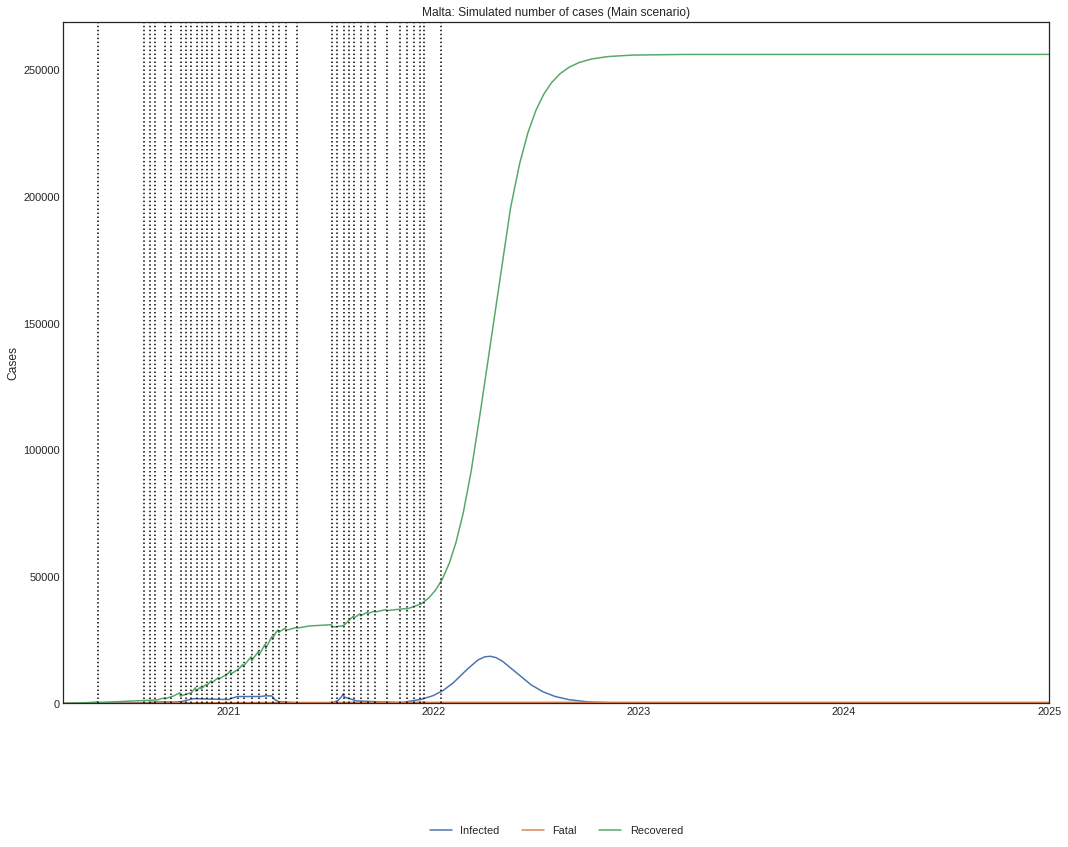

,Date,Infected,Fatal,Recovered
1751,2024-12-28,0,472,256141
1752,2024-12-29,0,472,256141
1753,2024-12-30,0,472,256141
1754,2024-12-31,0,472,256141
1755,2025-01-01,0,472,256141


In [16]:
snl.add(end_date="2025-01-01")
df = snl.simulate()
df.tail()

## Nearest infected spike

In [17]:
today = datetime.datetime.now() - datetime.timedelta(1)
infected_spike = df.loc[df["Date"] >= today]["Infected"].max()
print("Nearest infected spike:", str(df.loc[df["Infected"] == infected_spike].iloc[0]["Date"]))

Nearest infected spike: 2022-04-10 00:00:00


## Date when no one infected

In [18]:
print("Date when no one infected:", str(df.loc[df["Infected"] == 0].iloc[0]["Date"]))

Date when no one infected: 2023-07-07 00:00:00


# Poland

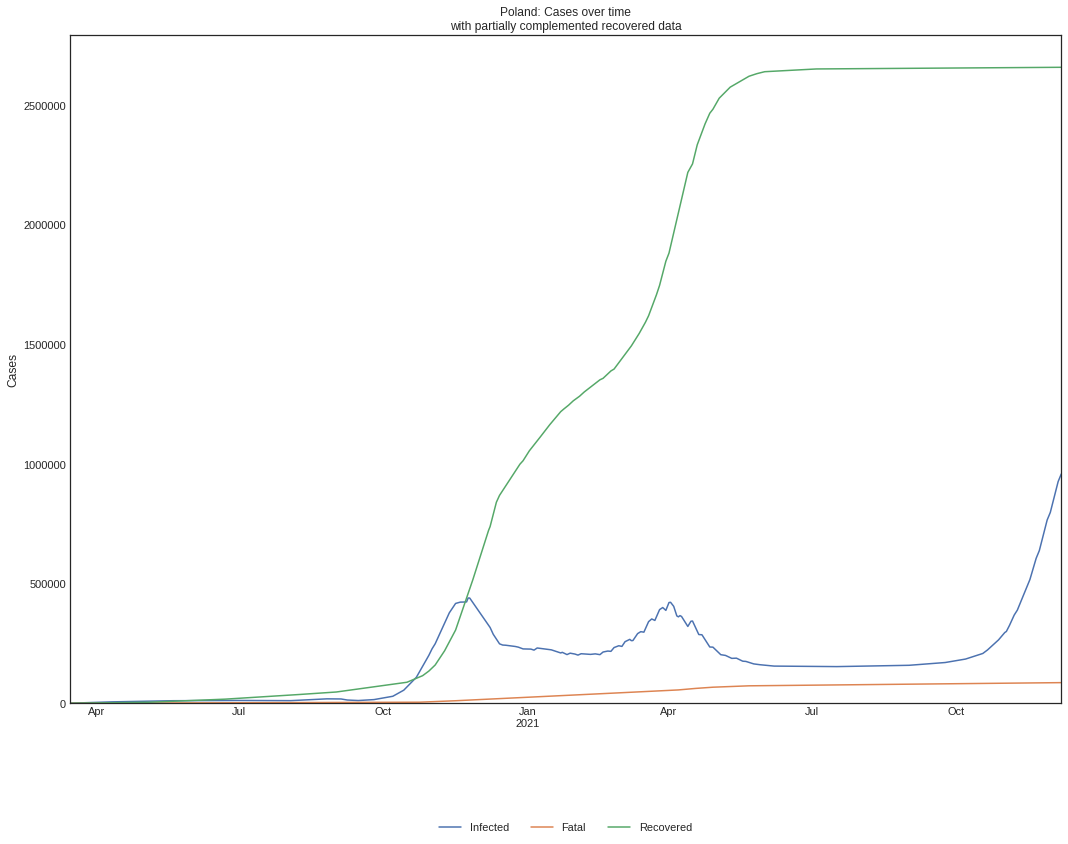

,Date,Infected,Fatal,Recovered
628,2021-12-03,879457,85126,2658869
629,2021-12-04,904481,85630,2658916
630,2021-12-05,926784,85675,2658962
631,2021-12-06,939962,85700,2659009
632,2021-12-07,958779,86205,2659056


In [19]:
snl = cs.Scenario(country="Poland", province=None)
snl.register(jhu_data)

df = snl.records()
df.tail()

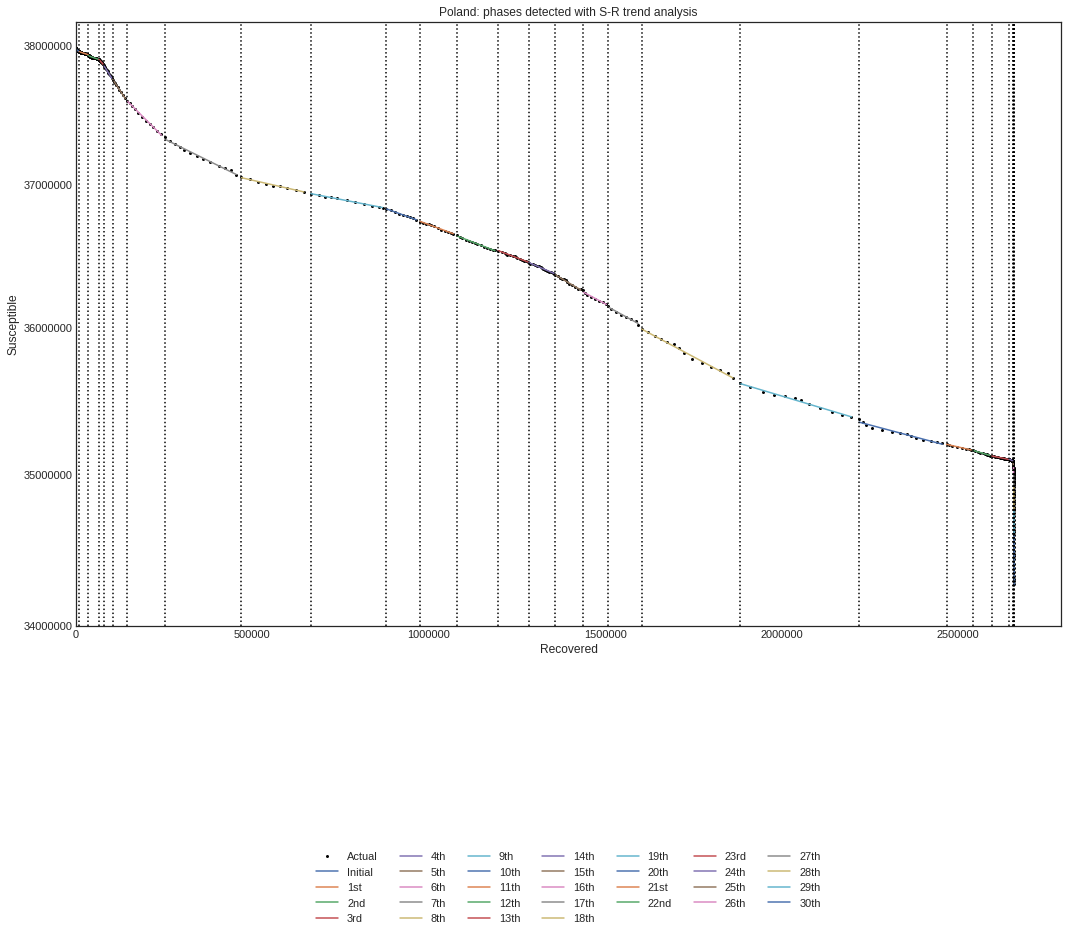

In [20]:
_ = snl.trend()

## Get model parameters

In [21]:
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 2 CPUs...
	 4th phase (11Oct2020 - 22Oct2020): finished  362 trials in 0 min 15 sec
	 0th phase (15Mar2020 - 25May2020): finished  417 trials in 0 min 19 sec
	 1st phase (26May2020 - 03Aug2020): finished  223 trials in 0 min  7 sec
	 5th phase (23Oct2020 - 31Oct2020): finished  354 trials in 0 min 12 sec
	 6th phase (01Nov2020 - 11Nov2020): finished  169 trials in 0 min  5 sec
	 2nd phase (04Aug2020 - 22Sep2020): finished  225 trials in 0 min  7 sec
	 7th phase (12Nov2020 - 24Nov2020): finished  325 trials in 0 min 11 sec
	 3rd phase (23Sep2020 - 10Oct2020): finished  321 trials in 0 min 11 sec
	12th phase (05Jan2021 - 18Jan2021): finished  222 trials in 0 min  7 sec
	 8th phase (25Nov2020 - 03Dec2020): finished  344 trials in 0 min 12 sec
	13th phase (19Jan2021 - 02Feb2021): finished  190 trials in 0 min  6 sec
	 9th phase (04Dec2020 - 14Dec2020): finished  223 trials in 0 min  7 sec
	10th phase (15Dec2020 - 23Dec2020): fi

In [22]:
snl.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,15Mar2020,25May2020,37974750,SIR-F,3.72,0.000544,0.002345,0.038900,0.008102,480,0.001,142.0,8.0,41.0,0.857235,417.0,0 min 19 sec
1st,Past,26May2020,03Aug2020,37974750,SIR-F,0.98,0.001596,0.000429,0.021294,0.021214,480,0.002,776.0,15.0,15.0,0.271809,223.0,0 min 7 sec
2nd,Past,04Aug2020,22Sep2020,37974750,SIR-F,1.01,0.000102,0.000593,0.047366,0.046407,480,0.000,561.0,7.0,7.0,0.309966,225.0,0 min 7 sec
3rd,Past,23Sep2020,10Oct2020,37974750,SIR-F,1.83,0.000184,0.001748,0.076173,0.039814,480,0.000,190.0,4.0,8.0,0.384932,321.0,0 min 11 sec
4th,Past,11Oct2020,22Oct2020,37974750,SIR-F,2.98,0.000030,0.000752,0.095945,0.031419,480,0.000,443.0,3.0,10.0,0.478034,362.0,0 min 15 sec
5th,Past,23Oct2020,31Oct2020,37974750,SIR-F,2.92,0.000049,0.000937,0.082497,0.027339,480,0.000,355.0,4.0,12.0,0.366898,354.0,0 min 12 sec
6th,Past,01Nov2020,11Nov2020,37974750,SIR-F,2.25,0.001027,0.000784,0.067561,0.029150,480,0.001,425.0,4.0,11.0,0.389079,169.0,0 min 5 sec
7th,Past,12Nov2020,24Nov2020,37974750,SIR-F,1.14,0.000395,0.000406,0.043494,0.037766,480,0.000,820.0,7.0,8.0,0.235834,325.0,0 min 11 sec
8th,Past,25Nov2020,03Dec2020,37974750,SIR-F,0.80,0.000081,0.000577,0.040308,0.049494,480,0.000,578.0,8.0,6.0,0.150991,344.0,0 min 12 sec
9th,Past,04Dec2020,14Dec2020,37974750,SIR-F,0.75,0.000911,0.000424,0.035997,0.047839,480,0.001,785.0,9.0,6.0,0.090148,223.0,0 min 7 sec


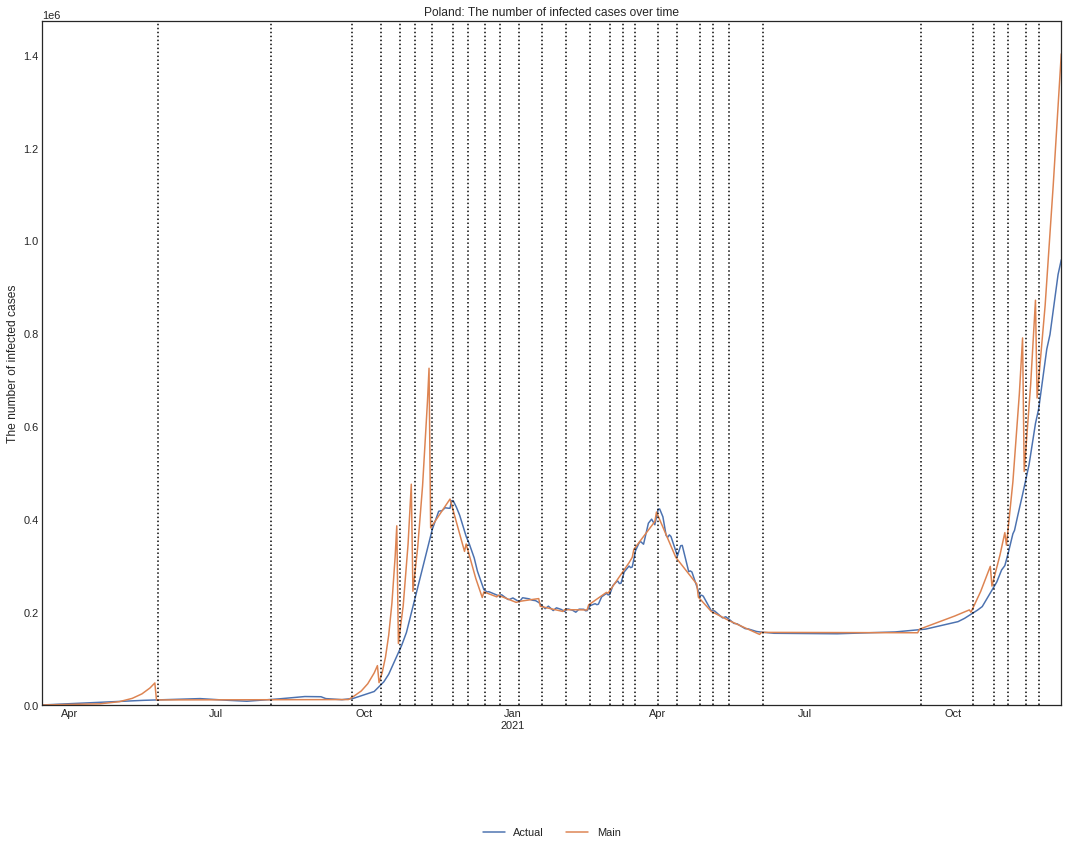

In [23]:
# Compare the actual values and the main scenario
_ = snl.history("Infected")

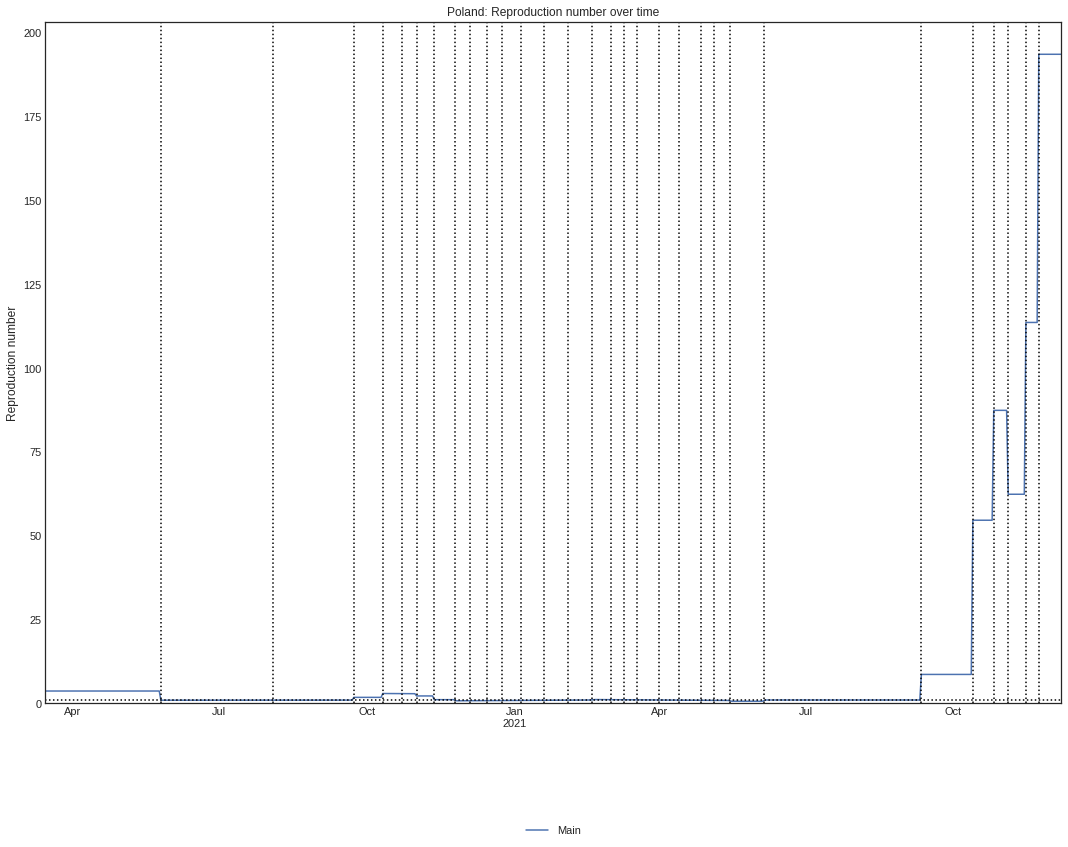

In [24]:
_ = snl.history(target="Rt")

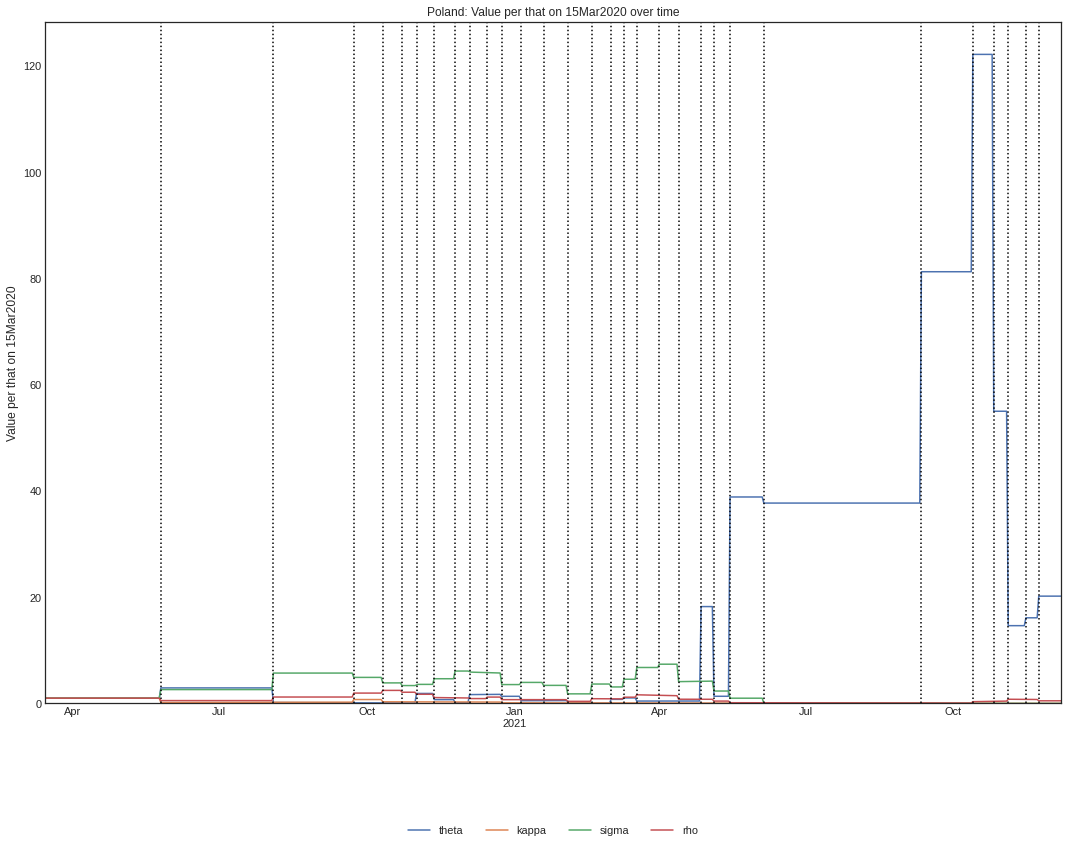

In [25]:
_ = snl.history_rate()

## Predict infected for 7, 30 and 300 days

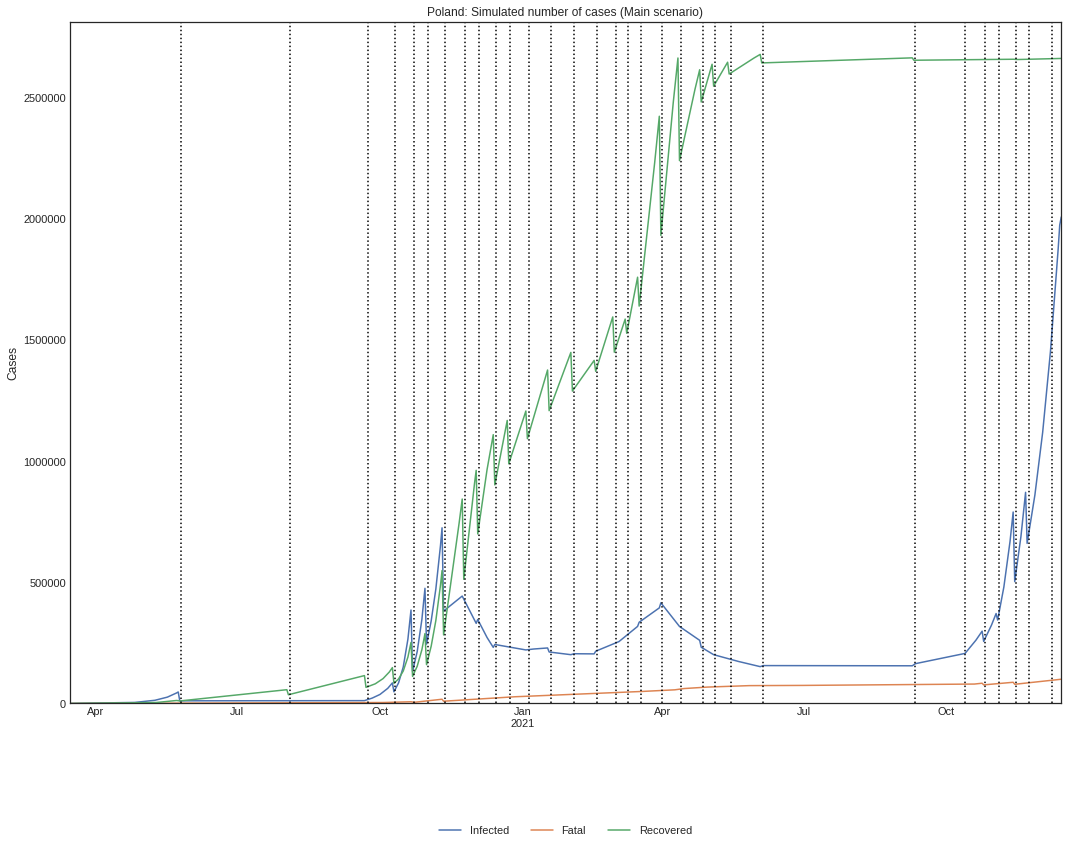

,Date,Infected,Fatal,Recovered
635,2021-12-10,1693983,95759,2661796
636,2021-12-11,1783120,96990,2662086
637,2021-12-12,1876680,98283,2662393
638,2021-12-13,1974851,99640,2662715
639,2021-12-14,2008633,100107,2662826


In [26]:
snl.add(days=7)
df = snl.simulate()
df.tail()

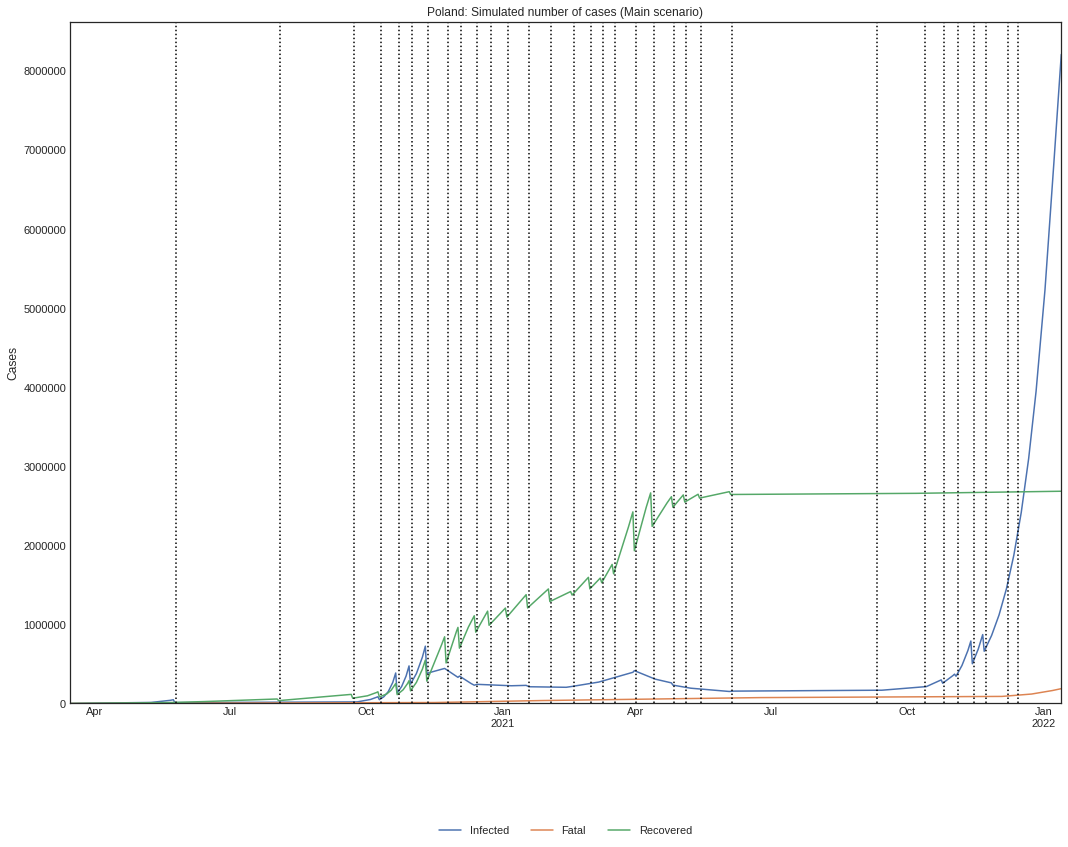

,Date,Infected,Fatal,Recovered
665,2022-01-09,7139810,172302,2681207
666,2022-01-10,7450364,176761,2682428
667,2022-01-11,7770534,181370,2683702
668,2022-01-12,8100314,186131,2685030
669,2022-01-13,8212373,187752,2685485


In [27]:
snl.add(days=30)
df = snl.simulate()
df.tail()

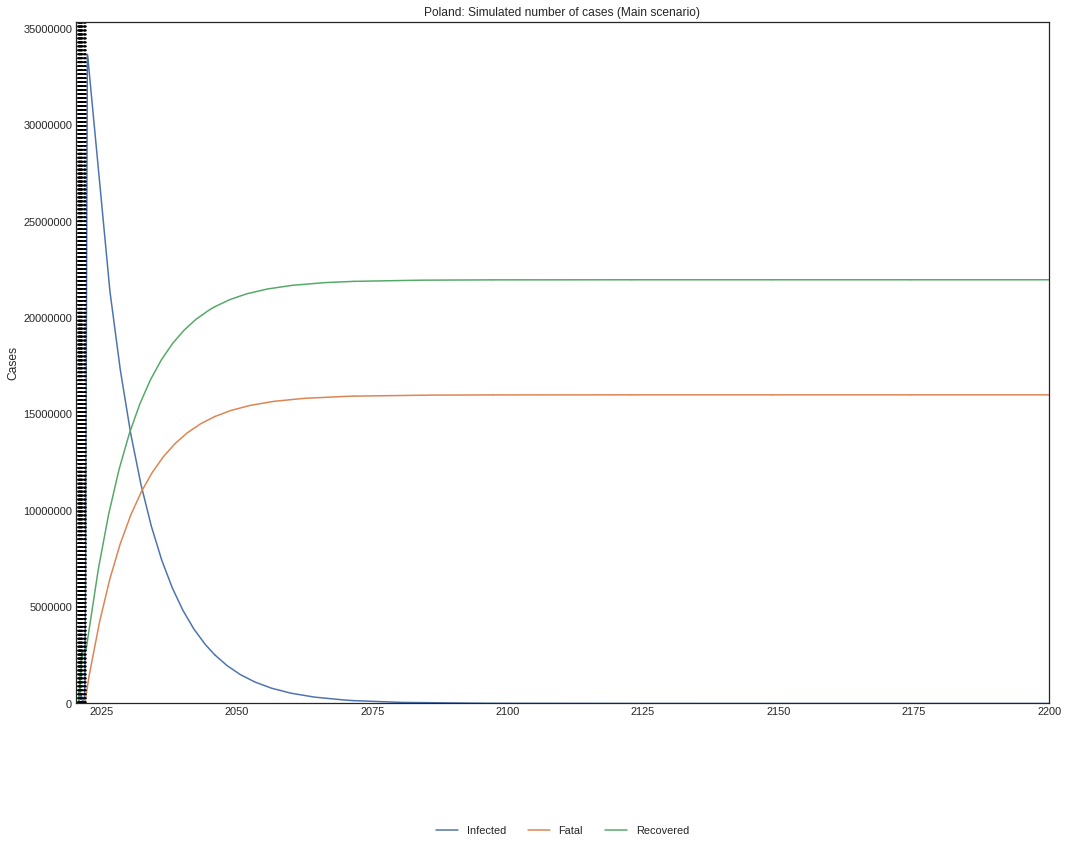

,Date,Infected,Fatal,Recovered
65666,2199-12-28,0,16004035,21970714
65667,2199-12-29,0,16004035,21970714
65668,2199-12-30,0,16004035,21970714
65669,2199-12-31,0,16004035,21970714
65670,2200-01-01,0,16004035,21970714


In [28]:
snl.add(end_date="2200-01-01")
df = snl.simulate()
df.tail()

## Nearest infected spike

In [29]:
today = datetime.datetime.now() - datetime.timedelta(1)
infected_spike = df.loc[df["Date"] >= today]["Infected"].max()
print("Nearest infected spike:", str(df.loc[df["Infected"] == infected_spike].iloc[0]["Date"]))

Nearest infected spike: 2022-05-11 00:00:00


## Date when no one infected

In [30]:
print("Date when no one infected:", str(df.loc[df["Infected"] == 0].iloc[0]["Date"]))

Date when no one infected: 2185-11-23 00:00:00
